<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA MODELLING
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**:

| **STT** | **Họ và tên** | **MSSV** |
|-------|---------------|---------|
| 1     | Trương Tiến Anh | 22120017 |
| 2     | Lê Nguyễn Gia Bảo | 22120023 |
| 3     | Đoàn Minh Cường | 22120043 |


---

## **Vấn đề được áp dụng Học máy:** 
## Dự đoán giá điện thoại dựa trên các đặc trưng quan trọng và cần thiết.

---

## Thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import ast
import time
import csv

## Đọc dữ liệu từ file CSV:

In [2]:
df = pd.read_csv("../data/processed_data.csv", index_col=0)

In [3]:
df.sample(3)

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,...,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
3474,Điện thoại Samsung Galaxy S24 FE 5G Chính hãng,Samsung Chính hãng,12.0,5.0,0,https://mobilecity.vn/dien-thoai/samsung-galax...,Xám Opal,18450000.0,NaN,Android 14,...,False,6.70,120.0,1900.0,AMOLED,2,NaN,25.0,"[50.0, 12.0, 8.0]",[10.0]
899,Điện thoại Xiaomi Redmi A3,Redmi,12.0,5.0,0,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Đen,2850000.0,2990000.0,Android 14,...,False,6.71,90.0,NaN,LCD,2,NaN,10.0,"[8.0, 0.08]",[5.0]
8047,Điện thoại Vsmart Joy 3 (Chính Hãng - đã kích ...,Vsmart,12.0,5.0,389,https://mobilecity.vn/vsmart/vsmart-joy-3.html,Tím,2450000.0,2250000.0,Android 9,...,False,6.50,NaN,NaN,LCD,2,NaN,18.0,"[13.0, 8.0, 2.0]",[12.0]


## Tiền xử lý dữ liệu cho các mô hình:

### Loại bỏ các cột không ảnh hưởng đến giá dựa vào kiến thức:

#### Loại bỏ cột `ten`, `duong_dan`, `loai_dien_thoai`, `mau_sac`, `thiet_ke`, `cpu`:

- `ten` là tên của các mẫu điện thoại.

In [4]:
df = df.drop(columns=['ten'])

- `duong_dan` là liên kết đến trang thông tin của điện thoại trên website.

In [5]:
df = df.drop(columns=['duong_dan'])

- `loai_dien_thoai` lưu thông tin cụ thể hơn cho `hang_dien_thoai`, không ảnh hưởng đến giá.

In [6]:
df = df.drop(columns=['loai_dien_thoai'])

- `mau_sac` lưu các màu sắc khác nhau của từng mẫu điện thoại, không ảnh hưởng đến giá.

In [7]:
df = df.drop(columns=['mau_sac'])

- `thiet_ke` mô tả cấu tạo của một chiếc điện thoại, không ảnh hưởng đến giá.

In [8]:
df = df.drop(columns=['thiet_ke'])

- `cpu` trong bộ dữ liệu này cũng là một cột không ảnh hưởng đến giá.

In [9]:
df = df.drop(columns=['cpu'])

#### Loại bỏ các dòng trùng lặp:

In [10]:
print(f"Số dòng trùng lặp hiện tại là: {df.duplicated().sum()}")

Số dòng trùng lặp hiện tại là: 5548


In [11]:
# Loại bỏ dòng trùng lặp
df = df.drop_duplicates()

In [12]:
print(f"Số dòng trùng lặp hiện tại là: {df.duplicated().sum()}")

Số dòng trùng lặp hiện tại là: 0


### Loại bỏ các cột dựa vào phân tích:

#### Xem tỷ lệ dữ liệu thiếu ở của các thuộc tính hiện tại:

In [13]:
def missing_ratio(col):
    return (col.isna().mean() * 100).round(1)

In [14]:
missing_ratio_df = df.apply(missing_ratio).sort_values(ascending=False)
missing_ratio_df = missing_ratio_df.reset_index()
missing_ratio_df.columns = ["Features", "Missing ratio"]
missing_ratio_df

,Features,Missing ratio
0,gia_cu,43.3
1,do_sang_man_hinh,42.5
2,loai_pin,27.9
3,tan_so_quet,24.6
4,gia_moi,19.1
5,bo_nho_trong,7.4
6,cong_suat_sac,7.3
7,kich_thuoc_man_hinh,5.7
8,loai_man_hinh,5.4
9,dung_luong_pin,2.3


- Nhận thấy rằng cột `do_sang_man_hinh` và `gia_cu` có tỉ lệ các giá trị thiếu rất cao so với phần còn lại. Ta sẽ loại bỏ 2 cột này:

In [15]:
df = df.drop(columns=["gia_cu", "do_sang_man_hinh"])

#### Loại bỏ các hàng tồn tại ít nhất một giá trị NaN.

- Mục đích: để giữ tính thực tế của dữ liệu, chúng em không điền giữ liệu thiếu mà sẽ xóa đi.

In [16]:
df = df.dropna()

#### Xem thông tin của dữ liệu hiện tại:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 18 to 8532
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thoi_gian_bao_hanh      1577 non-null   float64
 1   danh_gia                1577 non-null   float64
 2   so_luong_binh_luan      1577 non-null   int64  
 3   gia_moi                 1577 non-null   float64
 4   he_dieu_hanh            1577 non-null   object 
 5   ram                     1577 non-null   float64
 6   bo_nho_trong            1577 non-null   float64
 7   dung_luong_pin          1577 non-null   float64
 8   hang_dien_thoai         1577 non-null   object 
 9   la_dien_thoai_cu        1577 non-null   bool   
 10  kich_thuoc_man_hinh     1577 non-null   float64
 11  tan_so_quet             1577 non-null   float64
 12  loai_man_hinh           1577 non-null   object 
 13  so_the_sim              1577 non-null   int64  
 14  loai_pin                1577 non-null   obje

#### Xử lý các cột non-numeric:

##### Trước hết ta cần chuyển các thuộc tính có kiểu category về kiểu số:

In [18]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 18 to 8532
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   he_dieu_hanh            1577 non-null   object
 1   hang_dien_thoai         1577 non-null   object
 2   loai_man_hinh           1577 non-null   object
 3   loai_pin                1577 non-null   object
 4   do_phan_giai_cam_sau    1577 non-null   object
 5   do_phan_giai_cam_truoc  1577 non-null   object
dtypes: object(6)
memory usage: 86.2+ KB


- Tách cột `he_dieu_hanh` thành 2 cột `Android` và `iOS`:

In [19]:
df['he_dieu_hanh'].unique()

array(['Android 13', 'Android 12', 'Android 11', 'Android 14',
       'Android 10', 'Android 15', 'iOS 15', 'iOS 16', 'iOS 17', 'Khác',
       'iOS 18', 'Android 9'], dtype=object)

In [20]:
def extract_os_version(os, os_type):
    if os.startswith(os_type):
        return int(os.split(" ")[1])  # Lấy phiên bản (phần số)
    return 0  # Nếu không phải hệ điều hành đó, trả về 0

In [21]:
# Thêm 2 cột mới thay cho cột he_dieu_hanh
df['Android'] = df['he_dieu_hanh'].apply(lambda x: extract_os_version(x, 'Android'))
df['iOS'] = df['he_dieu_hanh'].apply(lambda x: extract_os_version(x, 'iOS'))

In [22]:
# Xóa cột he_dieu_hanh
df = df.drop(columns=['he_dieu_hanh'])

- Cột `do_phan_giai_cam_sau` và `do_phan_giai_cam_truoc`:

In [23]:
df['do_phan_giai_cam_sau'].sample(5)

8224             [64.0, 8.0, 2.0]
678     [200.0, 10.0, 10.0, 12.0]
525                  [50.0, 50.0]
3293                 [50.0, 50.0]
7194             [64.0, 8.0, 5.0]
Name: do_phan_giai_cam_sau, dtype: object

In [24]:
df['do_phan_giai_cam_truoc'].sample(5)

2629    [50.0]
6841    [16.0]
6434    [16.0]
7262    [16.0]
1802    [32.0]
Name: do_phan_giai_cam_truoc, dtype: object

- Nhận xét:
    - 2 cột trên lưu trữ danh sách thông số của từng camera ở trước và sau của mỗi điện thoại.
    - Ta sẽ chuyển 2 cột này về dạng số bằng cách cộng tổng các số trong mỗi danh sách.

In [25]:
df['do_phan_giai_cam_sau'] = df['do_phan_giai_cam_sau'].apply(ast.literal_eval)
df['do_phan_giai_cam_sau'] = df['do_phan_giai_cam_sau'].apply(sum)

In [26]:
df['do_phan_giai_cam_truoc'] = df['do_phan_giai_cam_truoc'].apply(ast.literal_eval)
df['do_phan_giai_cam_truoc'] = df['do_phan_giai_cam_truoc'].apply(sum)

- Cột `hang_dien_thoai`, `loai_man_hinh`, `loai_pin`:

In [27]:
df['hang_dien_thoai'].unique()

array(['Xiaomi', 'Samsung', 'Realme', 'Vivo', 'Nubia', 'iPhone', 'ZTE',
       'Tecno', 'itel', 'Motorola', 'Google', 'Honor', 'Oppo', 'Infinix',
       'OnePlus', 'Bphone', 'BLU', 'Ulefone', 'Meizu', 'Lenovo', 'Asus',
       'Nothing', 'Sony', 'Unihertz', 'Fairphone', 'NIO', 'Red', 'POCO'],
      dtype=object)

In [28]:
df['loai_man_hinh'].unique()

array(['LCD', 'OLED', 'AMOLED'], dtype=object)

In [29]:
df['loai_pin'].unique()

array(['Li-Po', 'Li-Ion', 'Si/C'], dtype=object)

- Nhận xét:
    - Các cột này gồm các giá trị không có mối quan hệ thứ tự.
    - Do đó dùng OneHotEncoder để chuyển đổi.

In [30]:
one_hot = pd.get_dummies(df['hang_dien_thoai'], prefix='hang_dien_thoai')
df = pd.concat([df, one_hot], axis=1)
one_hot = pd.get_dummies(df['loai_man_hinh'], prefix='loai_man_hinh')
df = pd.concat([df, one_hot], axis=1)
one_hot = pd.get_dummies(df['loai_pin'], prefix='loai_pin')
df = pd.concat([df, one_hot], axis=1)

df = df.drop(columns=['hang_dien_thoai', 'loai_man_hinh', 'loai_pin'])

In [31]:
# cat_features_onehot = ['hang_dien_thoai', 'loai_man_hinh', 'loai_pin']

In [32]:
# # Khởi tạo OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' để loại bỏ cột tham chiếu

# # Áp dụng OneHotEncoder lên các cột phân loại
# encoded_data = onehot_encoder.fit_transform(df[cat_features_onehot])

# # Chuyển đổi kết quả thành DataFrame và gắn tên cột mới
# encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(cat_features_onehot))

In [33]:
# df = df.reset_index(drop=True)

# # Nối các cột One-Hot đã mã hóa vào DataFrame gốc
# df = pd.concat([df, encoded_df], axis=1)

# # Xoá các cột phân loại ban đầu
# df = df.drop(columns=cat_features_onehot)

- Cột `la_dien_thoai_cu`:

In [34]:
df['la_dien_thoai_cu'].unique()

array([False,  True])

- Nhận xét:
    - Chuyển cột này bằng LabelEncoder.

In [35]:
print("Kích thước trước fillna:", df.shape)
df['la_dien_thoai_cu'] = df['la_dien_thoai_cu'].fillna(-1)
print("Kích thước sau fillna:", df.shape)

Kích thước trước fillna: (1577, 50)
Kích thước sau fillna: (1577, 50)


In [36]:
# Thay NaN bằng -1
df['la_dien_thoai_cu'] = df['la_dien_thoai_cu'].fillna(-1)

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder
df['la_dien_thoai_cu'] = label_encoder.fit_transform(df['la_dien_thoai_cu'])

In [37]:
df['la_dien_thoai_cu'].unique()

array([0, 1])

##### Xem lại thông tin của bộ dữ liệu:

In [38]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 18 to 8532
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   thoi_gian_bao_hanh         1577 non-null   float64
 1   danh_gia                   1577 non-null   float64
 2   so_luong_binh_luan         1577 non-null   int64  
 3   gia_moi                    1577 non-null   float64
 4   ram                        1577 non-null   float64
 5   bo_nho_trong               1577 non-null   float64
 6   dung_luong_pin             1577 non-null   float64
 7   la_dien_thoai_cu           1577 non-null   int64  
 8   kich_thuoc_man_hinh        1577 non-null   float64
 9   tan_so_quet                1577 non-null   float64
 10  so_the_sim                 1577 non-null   int64  
 11  cong_suat_sac              1577 non-null   float64
 12  do_phan_giai_cam_sau       1577 non-null   float64
 13  do_phan_giai_cam_truoc     1577 non-null   float64
 

##### Chúng ta đã chuyển đổi các cột non-numeric về numeric, vậy nên ta sẽ áp dụng tất cả thuộc tính này vào các mô hình.

### Chuẩn hóa cho các cột dữ liệu số ban đầu:

In [39]:
num_features = ['thoi_gian_bao_hanh', 'danh_gia', 'so_luong_binh_luan', 'ram', 'bo_nho_trong', 'dung_luong_pin', 'kich_thuoc_man_hinh', 'tan_so_quet', 'so_the_sim', 'cong_suat_sac']

In [40]:
# Khởi tạo StandardScaler
num_transformer = StandardScaler()

# Áp dụng StandardScaler lên các cột số ban đầu
df[num_features] = num_transformer.fit_transform(df[num_features])

> Ta có dataset đã được tiền xử lý trước khi input vào model

In [41]:
pd.set_option("display.max_columns", None)
df.reset_index(inplace=True, drop=True)
df.head(10)

,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,gia_moi,ram,bo_nho_trong,dung_luong_pin,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,so_the_sim,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc,Android,iOS,hang_dien_thoai_Asus,hang_dien_thoai_BLU,hang_dien_thoai_Bphone,hang_dien_thoai_Fairphone,hang_dien_thoai_Google,hang_dien_thoai_Honor,hang_dien_thoai_Infinix,hang_dien_thoai_Lenovo,hang_dien_thoai_Meizu,hang_dien_thoai_Motorola,hang_dien_thoai_NIO,hang_dien_thoai_Nothing,hang_dien_thoai_Nubia,hang_dien_thoai_OnePlus,hang_dien_thoai_Oppo,hang_dien_thoai_POCO,hang_dien_thoai_Realme,hang_dien_thoai_Red,hang_dien_thoai_Samsung,hang_dien_thoai_Sony,hang_dien_thoai_Tecno,hang_dien_thoai_Ulefone,hang_dien_thoai_Unihertz,hang_dien_thoai_Vivo,hang_dien_thoai_Xiaomi,hang_dien_thoai_ZTE,hang_dien_thoai_iPhone,hang_dien_thoai_itel,loai_man_hinh_AMOLED,loai_man_hinh_LCD,loai_man_hinh_OLED,loai_pin_Li-Ion,loai_pin_Li-Po,loai_pin_Si/C
0,0.371926,0.203912,-0.300904,2250000.0,-1.755898,-0.75546,0.06346,0,0.320734,-1.908224,0.232689,-1.331597,50.08,5.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
1,0.371926,0.203912,-0.300904,2550000.0,-1.174653,-0.75546,0.06346,0,0.320734,-1.908224,0.232689,-1.331597,50.08,5.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
2,0.371926,0.203912,-0.293715,2550000.0,-1.755898,-0.75546,0.06346,0,0.008678,-0.059097,0.232689,-0.955369,50.00,8.0,12,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
3,0.371926,0.203912,-0.293715,2750000.0,-1.174653,-0.75546,0.06346,0,0.008678,-0.059097,0.232689,-0.955369,50.00,8.0,12,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
4,0.371926,0.203912,-0.293715,2950000.0,-0.593408,-0.75546,0.06346,0,0.008678,-0.059097,0.232689,-0.955369,50.00,8.0,12,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
5,0.371926,0.203912,-0.015734,2550000.0,-1.755898,-0.75546,0.06346,0,0.543631,-1.908224,0.232689,-1.331597,52.00,5.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
6,0.371926,0.203912,-0.015734,2850000.0,-1.174653,-0.75546,0.06346,0,0.543631,-1.908224,0.232689,-1.331597,52.00,5.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
7,0.371926,0.203912,-0.015734,3150000.0,-0.593408,-0.75546,0.06346,0,0.543631,-1.908224,0.232689,-1.331597,52.00,5.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
8,0.371926,0.203912,-0.312886,2600000.0,-1.755898,-0.75546,0.06346,0,0.320734,-1.908224,0.232689,-1.331597,52.00,8.0,13,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
9,0.371926,0.203912,-0.312886,2900000.0,-1.174653,-0.75546,0.06346,0,0.320734,-1.908224,0.232689,-1.331597,52.00,8.0,13,0,False,False,False,Fals

## Tạo các mô hình:

**Người thực hiện**:

| **STT** | **Họ và tên** | **MSSV** |
|-------|---------------|---------|
| 1     | Bùi Đình Bảo | 21120201 |


### Tạo DataFrame X và y:

In [42]:
X = df.drop(columns=["gia_moi"])
y = df["gia_moi"]

### Chia dữ liệu thành tập huấn luyện và tập kiểm tra:

> Thư viện bổ sung:

In [43]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np

Chia tập train, test theo tỷ lệ 80/20

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=42)

Lưu một dataframe để đánh giá và so sánh các model

In [45]:
compare_df = pd.DataFrame()
compare_df["Actual"] = y_test

### Mô hình 1: Random Forest

In [46]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)  # Đưa các giá trị âm về 0

print("Random Forest RMSE:", root_mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))
compare_df["Pred_1"] = y_pred

Random Forest RMSE: 2145357.8943674583


### Mô hình 2: Gradient Boosting

In [47]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)  # Đưa các giá trị âm về 0

print("Gradient Boosting RMSE:", root_mean_squared_error(y_test, y_pred))
# print("R^2 Score:", r2_score(y_test, y_pred))
compare_df["Pred_2"] = y_pred

Gradient Boosting RMSE: 2303754.712993325


---

### Mô hình 3: XGBoost + CV

> Một mô hình hiệu quả sử dụng XGBoost + Cross Validation

In [48]:
# Tách thêm tập validation từ tập train
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Định nghĩa mô hình XGBRegressor
model = XGBRegressor(
    objective="reg:squarederror",  # Hồi quy squared error
    learning_rate=0.2,            # Learning rate
    max_depth=6,                  # Độ sâu cây
    seed=42,                      # Để tái lập kết quả
    n_estimators=1,               # Bắt đầu với 1 vòng (huấn luyện thủ công)
)

# Khởi tạo các biến để kiểm soát early stopping
n_estimators = 100                # Số vòng tối đa
early_stopping_rounds = 10        # Số vòng không cải thiện trước khi dừng
best_rmse = np.inf                # Giá trị RMSE tốt nhất ban đầu
no_improve_rounds = 0             # Đếm số vòng không cải thiện

# Huấn luyện từng vòng
for i in range(1, n_estimators + 1):
    model.n_estimators = i        # Cập nhật số lượng vòng boosting
    model.fit(X_train_split, y_train_split, verbose=False)
    
    # Dự đoán và đánh giá trên tập validation
    y_val_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    print(f"Iteration {i}: Validation RMSE = {rmse:.4f}")
    
    # Kiểm tra cải thiện
    if rmse < best_rmse:
        best_rmse = rmse
        no_improve_rounds = 0
    else:
        no_improve_rounds += 1

    # Dừng nếu không cải thiện trong `early_stopping_rounds` vòng
    if no_improve_rounds >= early_stopping_rounds:
        print(f"Early stopping at iteration {i}, best RMSE = {best_rmse:.4f}")
        break

# Đánh giá mô hình cuối cùng trên tập test
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)  # Đưa các giá trị âm về 0

test_rmse = root_mean_squared_error(y_test, y_pred)
print()
print(f"Test RMSE: {test_rmse:.4f}")
compare_df["Pred_0"] = y_pred

Iteration 1: Validation RMSE = 5616909.0760
Iteration 2: Validation RMSE = 4865783.5990
Iteration 3: Validation RMSE = 4343197.3908
Iteration 4: Validation RMSE = 3881476.3192
Iteration 5: Validation RMSE = 3556375.6792
Iteration 6: Validation RMSE = 3286149.4341
Iteration 7: Validation RMSE = 3040556.0271
Iteration 8: Validation RMSE = 2893042.2305
Iteration 9: Validation RMSE = 2785266.0558
Iteration 10: Validation RMSE = 2659237.3521
Iteration 11: Validation RMSE = 2568855.8740
Iteration 12: Validation RMSE = 2489812.5200
Iteration 13: Validation RMSE = 2437611.2602
Iteration 14: Validation RMSE = 2397610.4947
Iteration 15: Validation RMSE = 2374611.1842
Iteration 16: Validation RMSE = 2365478.0249
Iteration 17: Validation RMSE = 2321215.0163
Iteration 18: Validation RMSE = 2279065.9856
Iteration 19: Validation RMSE = 2241254.6031
Iteration 20: Validation RMSE = 2221160.4564
Iteration 21: Validation RMSE = 2205609.5287
Iteration 22: Validation RMSE = 2169974.7884
Iteration 23: Valid

## Đánh giá các mô hình:

In [49]:
compare_df.head(10)

,Actual,Pred_1,Pred_2,Pred_0
1246,6350000.0,1.038947e+07,7.469922e+06,9624448.0
813,18950000.0,1.557452e+07,1.600138e+07,18639296.0
1173,5250000.0,5.562000e+06,7.269495e+06,5549325.5
534,8910000.0,1.013510e+07,1.092910e+07,7809330.5
514,7650000.0,9.112700e+06,8.568905e+06,7971064.5
1525,20750000.0,1.931011e+07,1.958693e+07,20148272.0
522,7880000.0,9.850217e+06,1.076029e+07,9370441.0
274,4400000.0,4.500350e+06,5.559717e+06,4452823.5
494,7950000.0,8.032400e+06,8.160065e+06,7906184.5
65,8450000.0,9.551893e+06,9.116428e+06,8636206.0


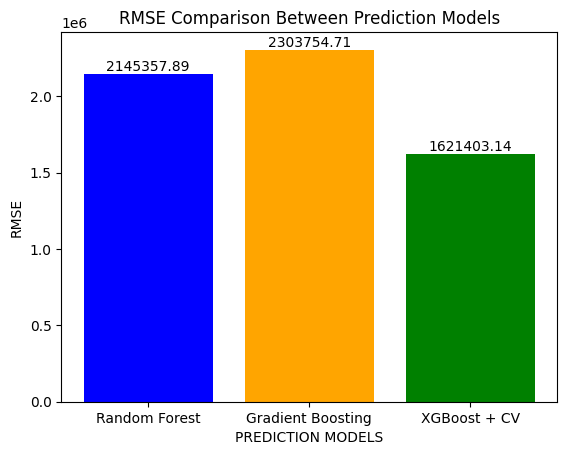

In [50]:
rmse_pred_1 = root_mean_squared_error(compare_df['Actual'], compare_df['Pred_1'])
rmse_pred_2 = root_mean_squared_error(compare_df['Actual'], compare_df['Pred_2'])
rmse_pred_0 = root_mean_squared_error(compare_df['Actual'], compare_df['Pred_0'])

rmse_values = [rmse_pred_1, rmse_pred_2, rmse_pred_0]
pred_labels = ['Random Forest', 'Gradient Boosting', 'XGBoost + CV']

plt.bar(pred_labels, rmse_values, color=['blue', 'orange', 'green'])

for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('PREDICTION MODELS')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Between Prediction Models')
plt.show()

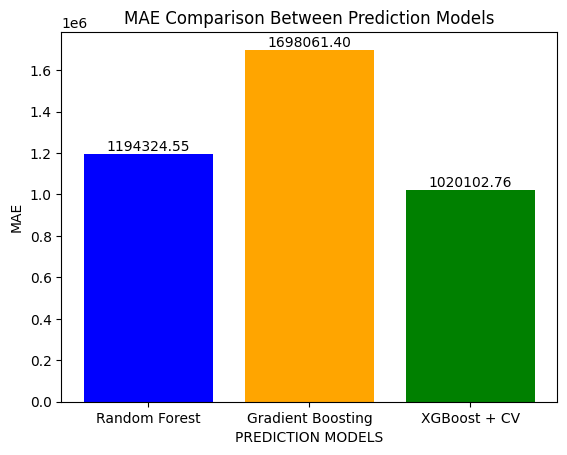

In [51]:
rmse_pred_1 = mean_absolute_error(compare_df['Actual'], compare_df['Pred_1'])
rmse_pred_2 = mean_absolute_error(compare_df['Actual'], compare_df['Pred_2'])
rmse_pred_0 = mean_absolute_error(compare_df['Actual'], compare_df['Pred_0'])

rmse_values = [rmse_pred_1, rmse_pred_2, rmse_pred_0]
pred_labels = ['Random Forest', 'Gradient Boosting', 'XGBoost + CV']

plt.bar(pred_labels, rmse_values, color=['blue', 'orange', 'green'])

for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('PREDICTION MODELS')
plt.ylabel('MAE')
plt.title('MAE Comparison Between Prediction Models')
plt.show()